<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_7/AST_Clase_7_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages('fpp2')
#install.packages('ggplot2')
#install.packages('forecast')
#install.packages('RCurl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
#####################
## CARGAR PAQUETES ##
#####################

suppressPackageStartupMessages({
  library(fpp2)
  library(ggplot2)
  library(forecast)
})


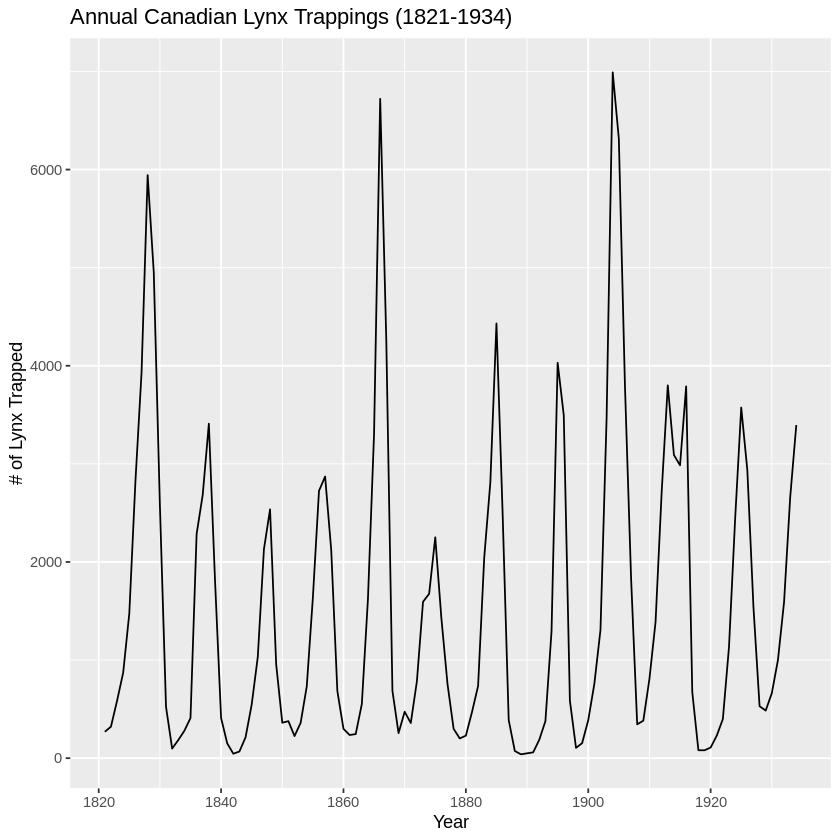

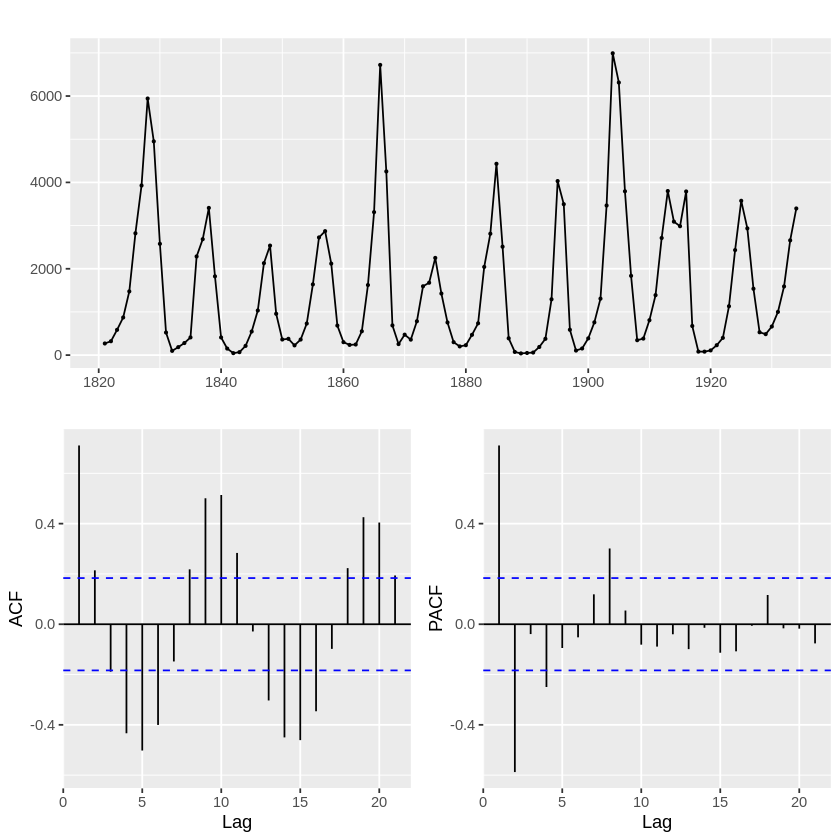

In [ ]:
# libreria q escribio Rob J Hyndman . capitulo 11, implementacion de estas redes
## CARGAR DATOS
data(lynx)

## GRÁFICO DE LA SERIE Annual Canadian Lynx Trappings (1821-1934)

autoplot(lynx) + 
  xlab("Year") + 
  ylab("# of Lynx Trapped") + 
  ggtitle("Annual Canadian Lynx Trappings (1821-1934)")

## GRÁFICO DE LA SERIE, FAC Y FACP
ggtsdisplay(lynx)


entrenar una red, donde tengamos en cuenta 4 valores pasados de la misma. y suponemos dos nodos ocultos. Es para series univariadas. Aqui capta el comportamiento no estacionario. 

In [ ]:
help(nnetar)

In [ ]:
y = BoxCox(lynx, lambda = BoxCox.lambda(lynx))

In [ ]:
print(y)



Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  8.824767  9.244462 10.757018 11.839088 13.375729 15.444500 16.582033
  [8] 18.088024 17.411384 15.143479 10.464092  6.631752  7.960179  8.910525
 [15]  9.838467 14.749682 15.279574 16.088053 14.030939  9.838467  7.529588
 [22]  5.157004  5.917498  8.287466 10.576032 12.323266 14.521469 15.090545
 [29] 12.104802  9.529658  9.636271  8.411918  9.522863 11.354633 13.696465
 [36] 15.328803 15.503442 14.506362 11.174256  9.074500  8.521150  8.607356
 [43] 10.604575 13.668109 15.987692 18.554044 16.864673 11.186078  8.700046
 [50] 10.205566  9.509224 11.546602 13.612652 13.767326 14.701095 13.273436
 [57] 11.446605  9.074500  8.156920  8.452152 10.183897 11.373238 14.387966
 [64] 15.432605 17.010517 15.057911  9.713741  6.053076  4.904356  5.309984
 [71]  5.650570  8.007816  9.636271 12.977642 16.673416 16.174130 10.766021
 [78]  6.771107  7.557852  9.700971 11.453851 13.012013 16.144309 18.705097
 [85] 18.315722 16.460055 14.05150

In [ ]:
## ENTRENAR MODELO NNAR
nn1 = nnetar(y = lynx, 
             p = 4, 
             P = 2,
             size = 3) 

Warning message in nnetar(y = lynx, p = 4, P = 2, size = 3):
“Non-seasonal data, ignoring seasonal lags”


In [ ]:
## VER ESTRUCTURA DE LOS DATOS
print(nn1)


Series: lynx 
Model:  NNAR(4,3) 
Call:   nnetar(y = lynx, p = 4, P = 1, size = 3)

Average of 20 networks, each of which is
a 4-3-1 network with 19 weights
options were - linear output units 

sigma^2 estimated as 287280


Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


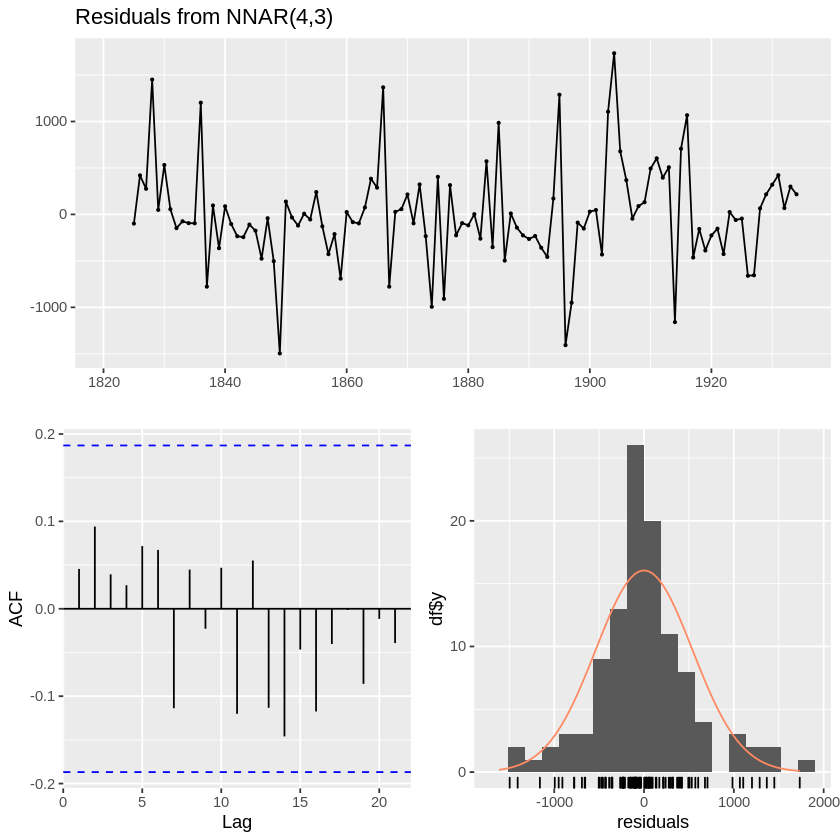

In [ ]:
## CHEQUEAR ESTRUCTURA DE LOS RESIDUOS DEL MODELO
checkresiduals(nn1)

In [ ]:
tseries::jarque.bera.test(na.omit(resid(nn1)))


	Jarque Bera Test

data:  na.omit(resid(nn1))
X-squared = 2.0075, df = 2, p-value = 0.3665


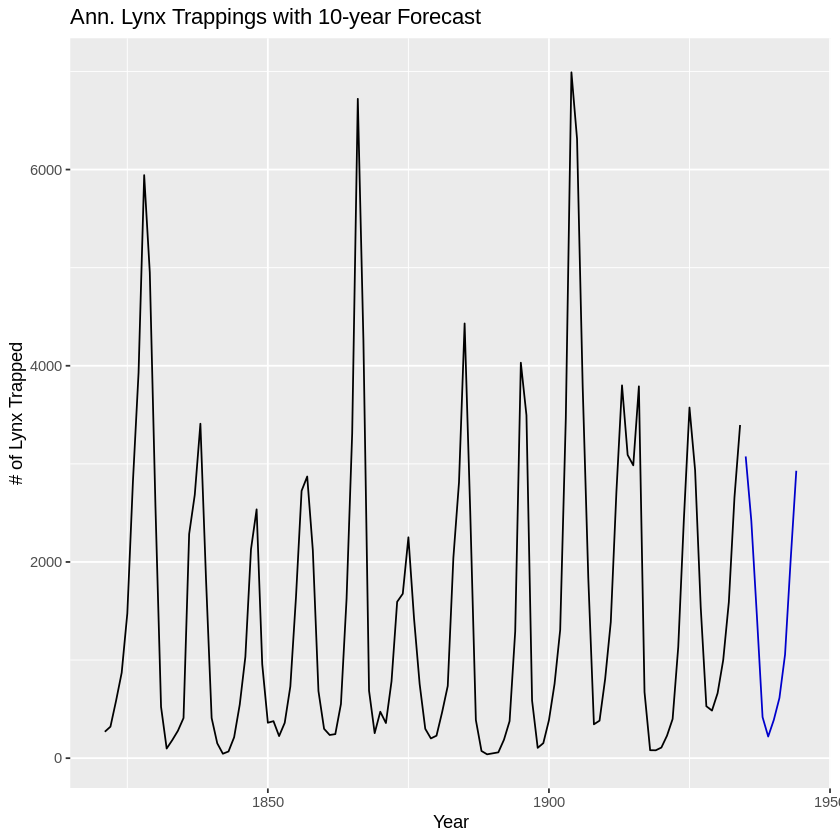

In [ ]:
fc1 = forecast(nn1, h = 10)
autoplot(fc1) + 
  xlab("Year") +
  ylab("# of Lynx Trapped") + 
  ggtitle("Ann. Lynx Trappings with 10-year Forecast")

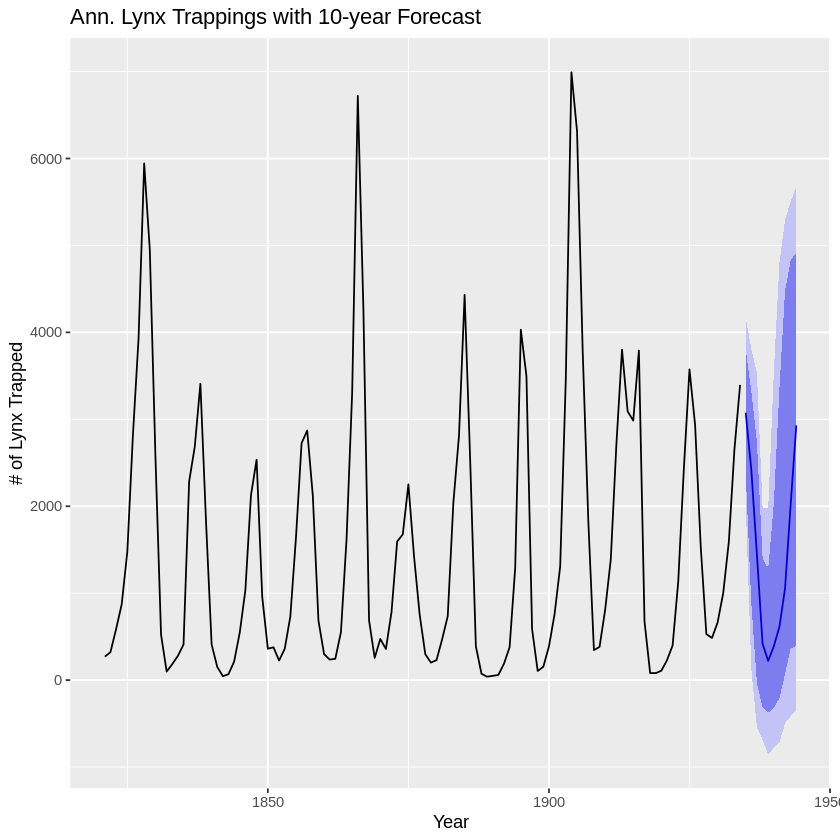

In [ ]:
## FORECASTING CON INTERVALOS DE PREDICCIÓN
fc1.PI = forecast(nn1,h=10, PI = T)
autoplot(fc1.PI) + 
  xlab("Year") + 
  ylab("# of Lynx Trapped") + 
  ggtitle("Ann. Lynx Trappings with 10-year Forecast")

In [ ]:
## VISTA DE LOS INTERVALOS PREDICHOS
fc1.PI

     Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
1935      3075.6053 2379.27449 3809.331 2032.2432 4172.749
1936      2418.9700  878.25830 3320.784  123.1137 3808.525
1937      1441.0140  -35.11002 2736.964 -545.3607 3529.446
1938       418.2596 -316.71059 1409.361 -686.1742 1986.036
1939       220.4712 -374.63368 1276.146 -853.9221 1970.358
1940       389.8150 -319.83274 2027.834 -780.5182 3539.057
1941       613.3977 -207.91513 3353.562 -718.8848 4798.494
1942      1056.3327   69.45694 4478.791 -495.7360 5295.910
1943      2022.3319  366.16532 4827.969 -413.2233 5508.344
1944      2929.5614  391.12618 4919.644 -343.6851 5673.874

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


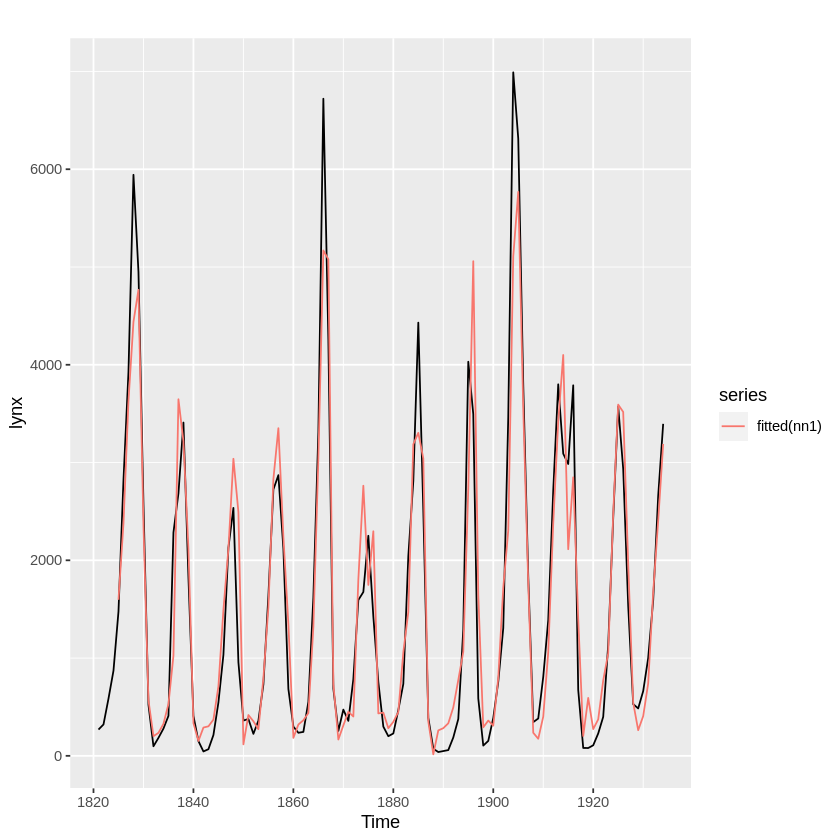

In [ ]:
## GRAFICO DE LA SERIE ORIGINAL Y EL MODELO AJUSTADO

autoplot(lynx) + 
  autolayer(fitted(nn1))


In [ ]:
## CONSULTAR CANTIDAD DE DATOS DE LA SERIE
length(lynx)    ## 114 DATOS

[1] 114

In [ ]:
## SEPARAR EN CONJUNTO DE ENTRENAMIENTO Y DE TESTING
lynx.train = head(lynx,100)   ## TOMAR LOS PRIMEROS 100
lynx.test = tail(lynx,14)     ## TOMAR LOS ÚLTIMOS 14

In [ ]:
## ENTRENAR EL MODELO CON LOS DATOS DEL CONJUNTO DE ENTRENAMIENTO
nn1 = nnetar(lynx.train,
             p=4,
             P=0,
             size=2)
nn1

## FORECASTING PARA LOS 14 PASOS ADELANTE DE LA SERIE
fc1 = forecast(nn1,h=14)

Series: lynx.train 
Model:  NNAR(4,2) 
Call:   nnetar(y = lynx.train, p = 4, P = 0, size = 2)

Average of 20 networks, each of which is
a 4-2-1 network with 13 weights
options were - linear output units 

sigma^2 estimated as 411121

In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
accuracy(fc1,lynx.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.07505555,641.1869,443.1614,-53.57837,74.48726,0.5196927,0.03400074,NA
Test set,143.78936112,776.3607,685.6484,-10.44911,64.82907,0.8040558,0.69617892,2.256156


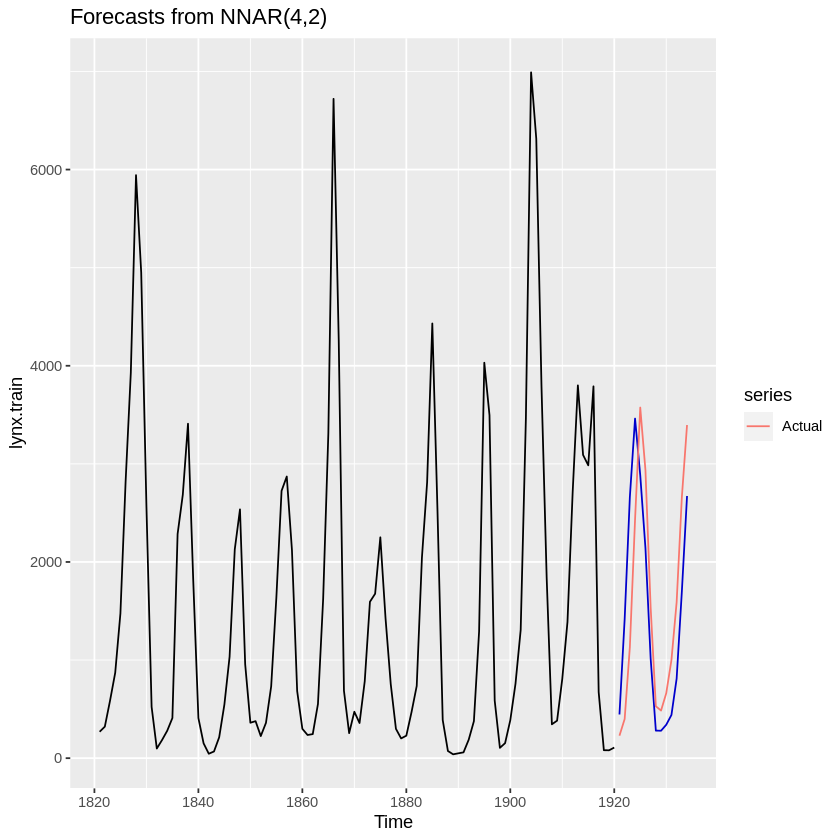

In [ ]:
## GRAFICAR LA SERIE Y LAS PREDICCIONES SOBRE EL CONJUNTO DE DATOS DE TESTING
autoplot(fc1) + 
  autolayer(lynx.test,series="Actual")


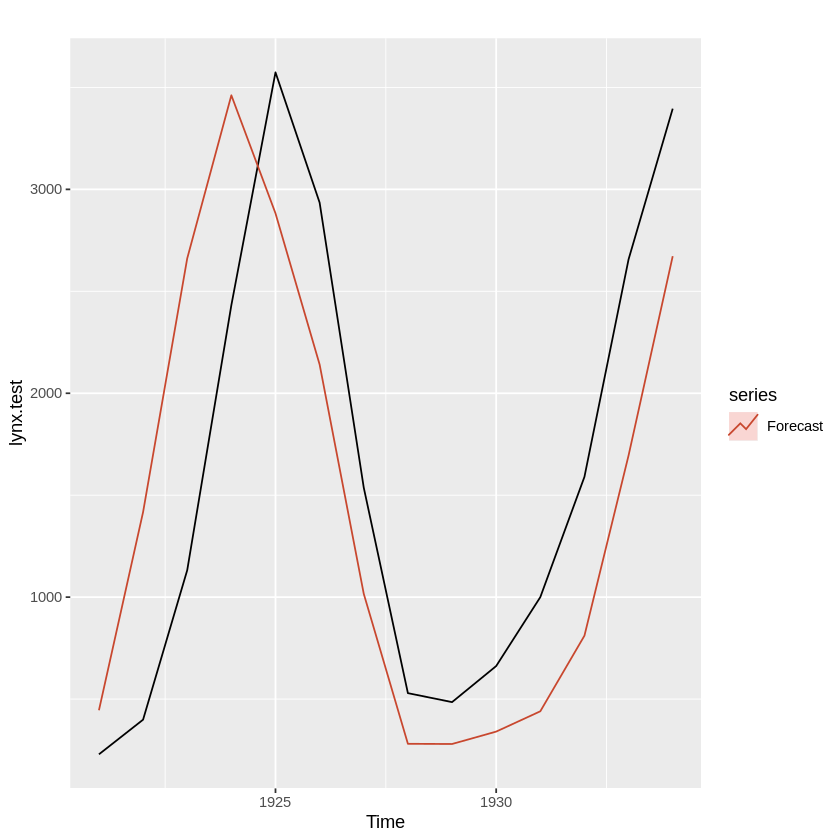

In [ ]:
## GRAFICAR LOS DATOS REALES DEL CONJUNTO DE TESTING CON LAS PREDICCIONES 
autoplot(lynx.test) + 
  autolayer(fc1,series="Forecast")

######################################################  
## OTRO EJEMPLO: U.S. Monthly Retail Clothing Sales ## 
###################################################### 

In [ ]:
## CARGAR DATOS
library(RCurl)
x <- getURL("https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/US%20Clothing%20Sales%20(millions%20of%20dollars%20-%201992%20to%20present).csv")
Cloth <- read.csv(text = x)

head(Cloth)

,DATE,Clothing
,<chr>,<int>
1,1/1/1992,6938
2,2/1/1992,7524
3,3/1/1992,8475
4,4/1/1992,9401
5,5/1/1992,9558
6,6/1/1992,9182


In [ ]:
## CONFIGURAR LOS DATOS COMO SERIE DE TIEMPO
ClothSales = ts(Cloth$Clothing,start=1992,frequency=12)

In [ ]:
## SELECCIONAR LOS DATOS DESDE 2010 EN ADELANTE
ClothSales = window(ClothSales,start=2010)

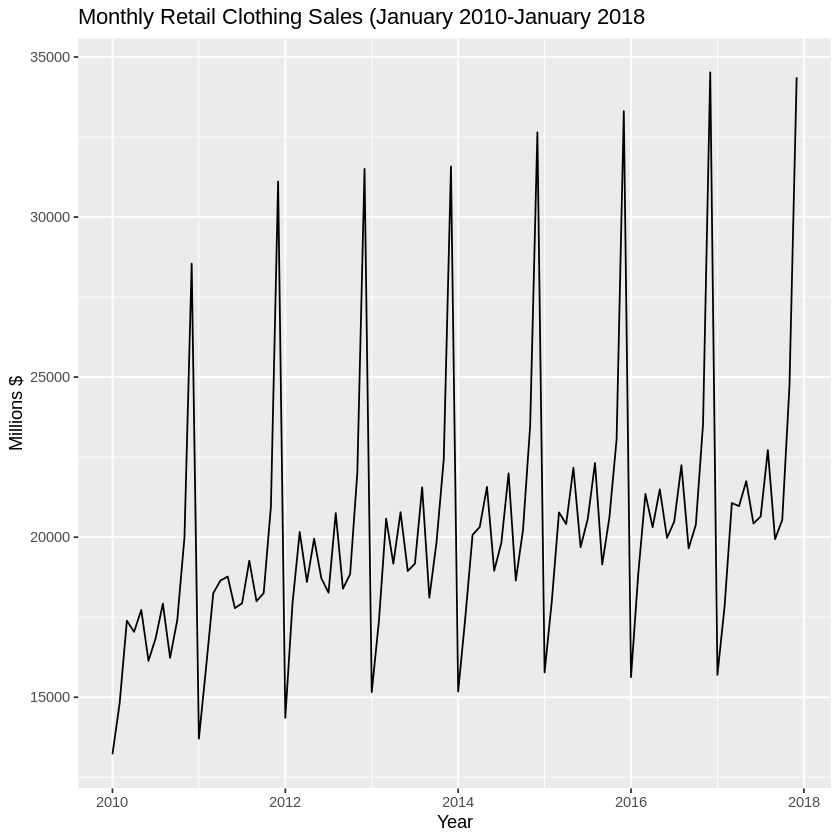

In [ ]:
## GRAFICAR LA SERIE DESDE 2010 EN ADELANTE
autoplot(ClothSales) + 
  xlab("Year") + 
  ylab("Millions $") + 
  ggtitle("Monthly Retail Clothing Sales (January 2010-January 2018")



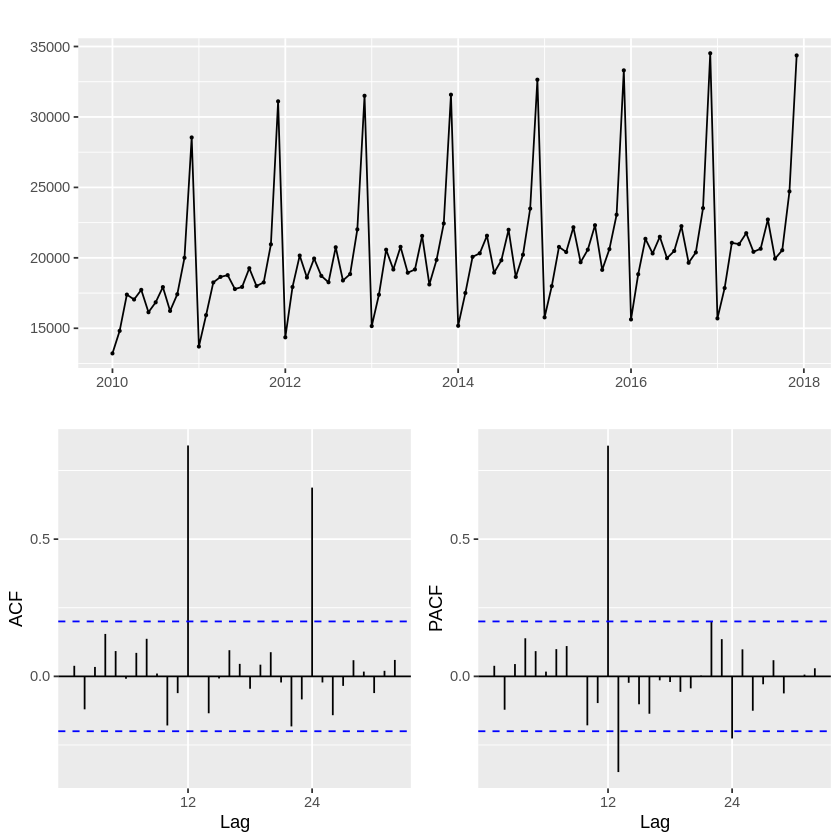

In [ ]:
## ANALIZAR LA ESTRUCTURA DE LA SERIE (FAC y FACP)
ggtsdisplay(ClothSales)



In [ ]:
## CONSTRUIR EL MODELO
nn1 = nnetar(ClothSales,
             p = 3, 
             P = 1,
             size = 3)



In [ ]:
nsdiffs(ClothSales)

[1] 1

In [ ]:
## EVALUAR RESULTADOS DEL MODELO
print(nn1)

Series: lynx 
Model:  NNAR(4,3) 
Call:   nnetar(y = lynx, p = 4, P = 2, size = 3)

Average of 20 networks, each of which is
a 4-3-1 network with 19 weights
options were - linear output units 

sigma^2 estimated as 279230


Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


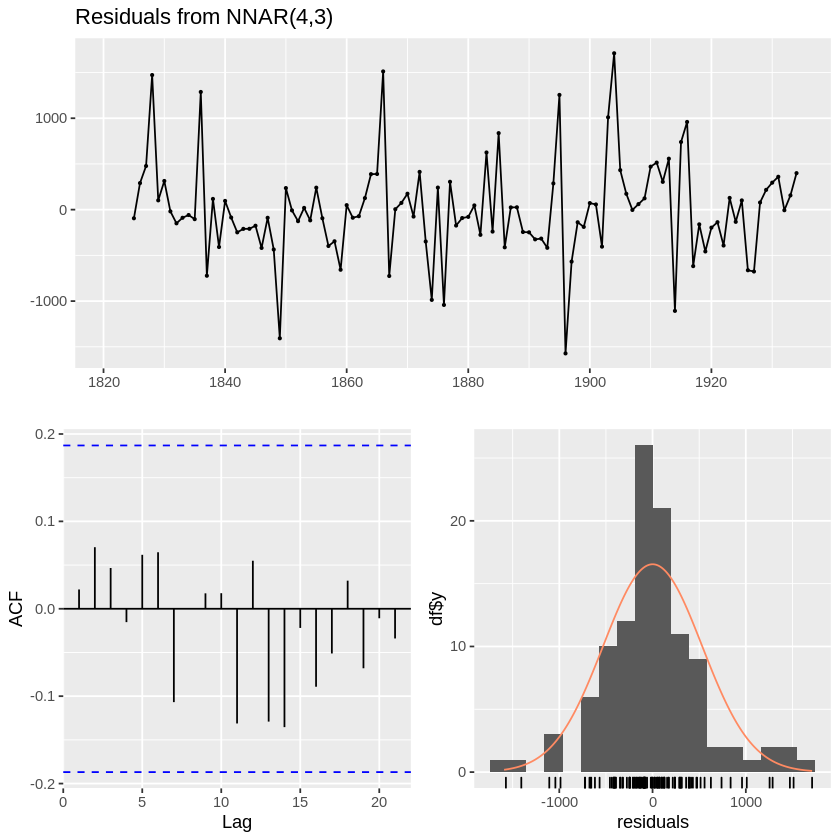

In [ ]:
## CHEQUEAR LOS RESIDUOS DEL MODELO
checkresiduals(nn1)



In [ ]:
## FORECASTING POR INTERVALOS DE LA SERIE PARA LOS 24 PASOS ADELANTE
fc = forecast(nn1,h=24,PI=T)



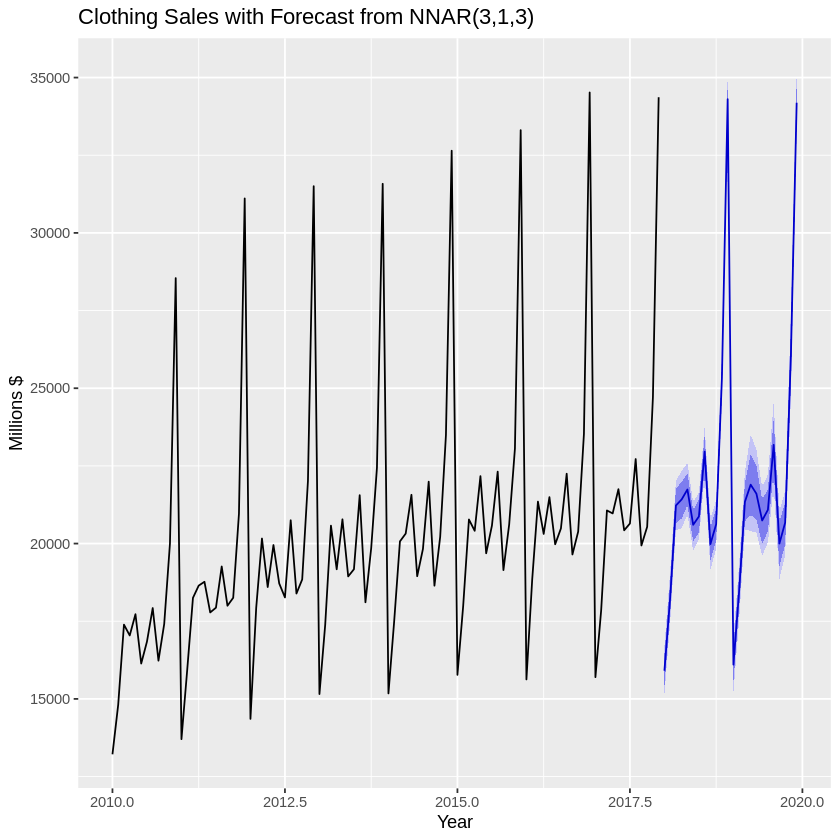

In [ ]:
## GRAFICAR LAS PREDICCIONES DE LA SERIE
autoplot(fc) + 
  xlab("Year") + 
  ylab("Millions $") + 
  ggtitle("Clothing Sales with Forecast from NNAR(3,1,3)")



In [ ]:
## CONSULTAR LA CANTIDAD DE DATOS DE LA SERIE
length(ClothSales)


[1] 96

In [ ]:
## SEPARAR EN CONJUNTO DE ENTRENAMIENTO Y DE TESTING
Cloth.train = head(ClothSales,
                   length(ClothSales)-12)   ## MENOS LOS ÚLTIMOS 12 PARA ENTRENAR

Cloth.test = tail(ClothSales,12)            ## LOS ÚLTIMOS 12 PARA TESTEAR



In [ ]:
## ENTRENAR EL MODELO CON LOS DATOS DE ENTRENAMIENTO 
nn1 = nnetar(Cloth.train,
             p = 4,
             P = 2,
             size = 3,
             repeats = 30)



In [ ]:
## FORECASTING CON EL MODELO ENTRENADO PARA LOS SIGUIENTES 12 PASOS ADELANTE
fc = forecast(nn1,h = 12)



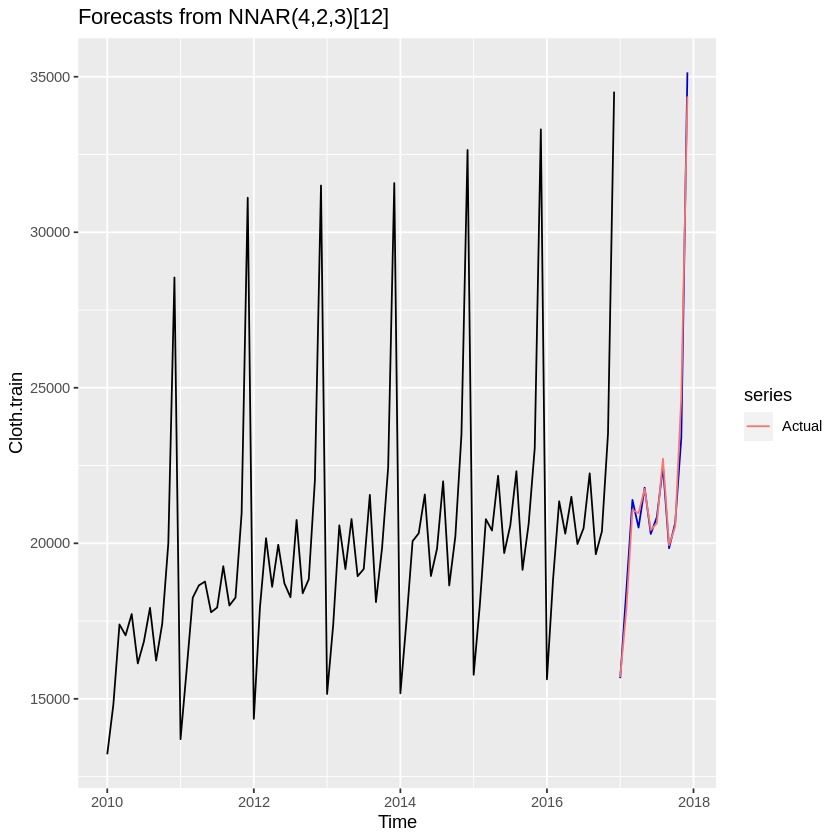

In [ ]:
## GRAFICO DE LAS PREDICCIONES CON EL MODELO ENTRENADO CON EL SOLAPAMIENTO DE LOS DATOS DE TESTING
autoplot(fc) + 
  autolayer(Cloth.test,series="Actual")



In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
accuracy(fc,Cloth.test)



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3909217,282.1141,232.4101,-0.02703565,1.167554,0.3256626,0.0162469,NA
Test set,19.9406669,514.9642,362.8450,0.09247229,1.574315,0.5084336,-0.3926420,0.1677679


El método de Holt-Winters es un procedimiento de pronóstico de series de tiempo muy común capaz de incluir tanto la tendencia como la estacionalidad. 

In [ ]:
## COMPARACIÓN CON OTRAS METODOLOGÍAS

## HW: HOLT-WINTERS SEASONAL METHOD
Cloth.hw = hw(Cloth.train,h=12)
accuracy(Cloth.hw,Cloth.test)



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-35.91749,472.7993,376.6087,-0.2451221,1.945083,0.5277198,-0.1113544,NA
Test set,-713.48630,895.4132,790.0456,-3.7373643,3.980354,1.1070448,0.3053438,0.3015985


ETS predice un valor futuro en función de los valores (históricos). El valor pronosticado es una continuación de los valores históricos. Este modelo utiliza tres parámetros: error, tendencia y estacional.

In [ ]:
# ETS: ERROR TREND SEASONAL METHOD
Cloth.ets = ets(Cloth.train)
fc.ets = forecast(Cloth.ets,h=12)
accuracy(fc.ets,Cloth.test)



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-36.407900,361.3310,295.4089,-0.2299679,1.490207,0.4139393,-0.07026661,NA
Test set,-8.140436,455.2464,376.9143,-0.2342479,1.814780,0.5281480,0.20467832,0.1593633


In [ ]:
# ARIMA: ENTRENAR MODELO, FORECASTING PARA LOS PRÓXIMOS 12 PASOS Y EVALUACIÓN DE PERFORMANCE
Cloth.ARIMA = auto.arima(Cloth.train,
                         approximation = F,
                         stepwise = F)

fc.ARIMA = forecast(Cloth.ARIMA,h=12)
accuracy(fc.ARIMA,Cloth.test)


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-7.431997,467.4223,338.0120,-0.1702852,1.679419,0.4736365,-0.02579927,NA
Test set,-421.733105,651.8787,536.3637,-2.0878429,2.570529,0.7515752,-0.10992446,0.2425827


In [ ]:
## ENTRENAR EL MODELO PARA CONSTRUIR INTERVALOS DE PREDICCIÓN
nn1 = nnetar(ClothSales,
             p = 4,
             P = 2,
             size = 3)



In [ ]:
## CREACIÓN DE UNA MATRIZ DE 10 SERIES CON 24 MESES
sim <- ts(matrix(0, nrow=24L, ncol=10L),
          start = end(ClothSales)[1L],
          frequency=12)


In [ ]:
## COMPLETAR LA MATRIZ SIMULANDO VALORES CON EL MODELO ENTRENADO
for(i in seq(10)){
  sim[,i] = simulate(nn1,nsim = 24L)
}

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



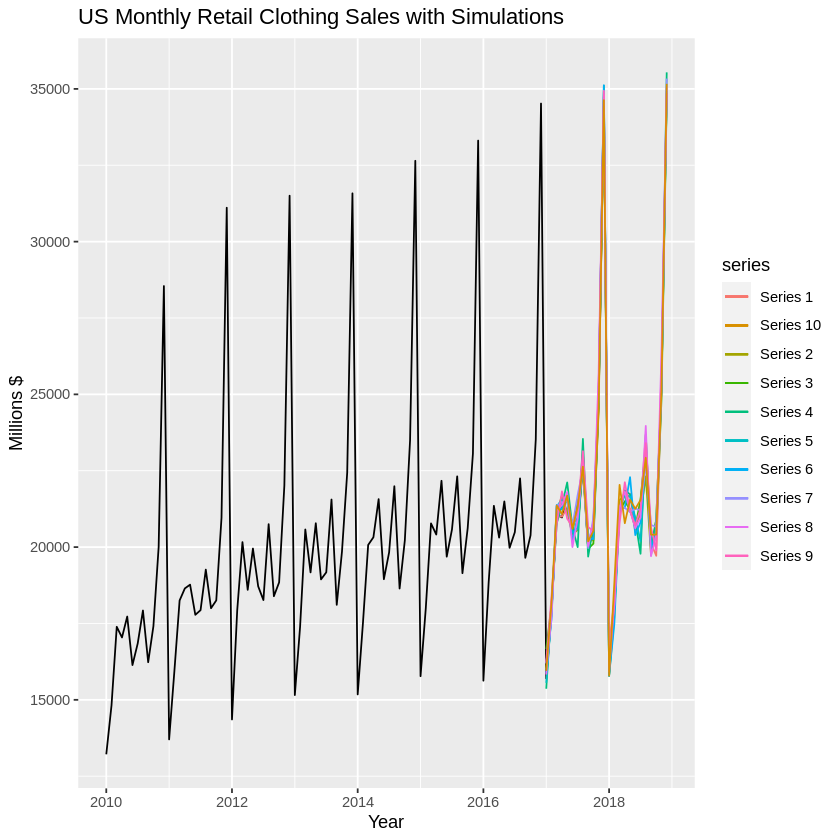

In [ ]:
## GRAFICAR LAS 10 SERIES SIMULADAS CON EL MODELO
autoplot(ClothSales) + 
  autolayer(sim) + 
  ylab("Millions $") + 
  xlab("Year") + 
  ggtitle("US Monthly Retail Clothing Sales with Simulations")



In [ ]:
## FORECASTING CON INTERVALOS DE PREDICCIÓN PARA LOS PROXIMOS 24 PASOS
fc = forecast(nn1,PI=T,h=24)
print(fc)



         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       15993.71 15594.71 16385.13 15406.26 16647.66
Feb 2018       18127.16 17707.56 18560.33 17531.30 18778.64
Mar 2018       21231.46 20817.13 21643.26 20581.80 21865.07
Apr 2018       21202.88 20744.24 21656.42 20533.26 21919.70
May 2018       21683.21 21258.49 22117.03 21007.08 22348.84
Jun 2018       20557.63 20115.23 20988.93 19889.11 21189.58
Jul 2018       20906.59 20467.66 21346.88 20281.09 21557.81
Aug 2018       22881.41 22445.59 23305.31 22208.25 23533.30
Sep 2018       20051.19 19607.08 20477.57 19424.66 20745.79
Oct 2018       20553.83 20151.76 21004.99 19949.35 21196.53
Nov 2018       24933.10 24501.10 25335.71 24302.76 25583.29
Dec 2018       34812.95 34358.56 35188.89 34116.31 35405.69
Jan 2019       16160.11 15716.00 16633.62 15466.01 16879.45
Feb 2019       18128.63 17707.84 18553.42 17506.59 18812.40
Mar 2019       21370.67 20892.57 21901.15 20609.61 22178.21
Apr 2019       21556.03 20968.82 22200.8

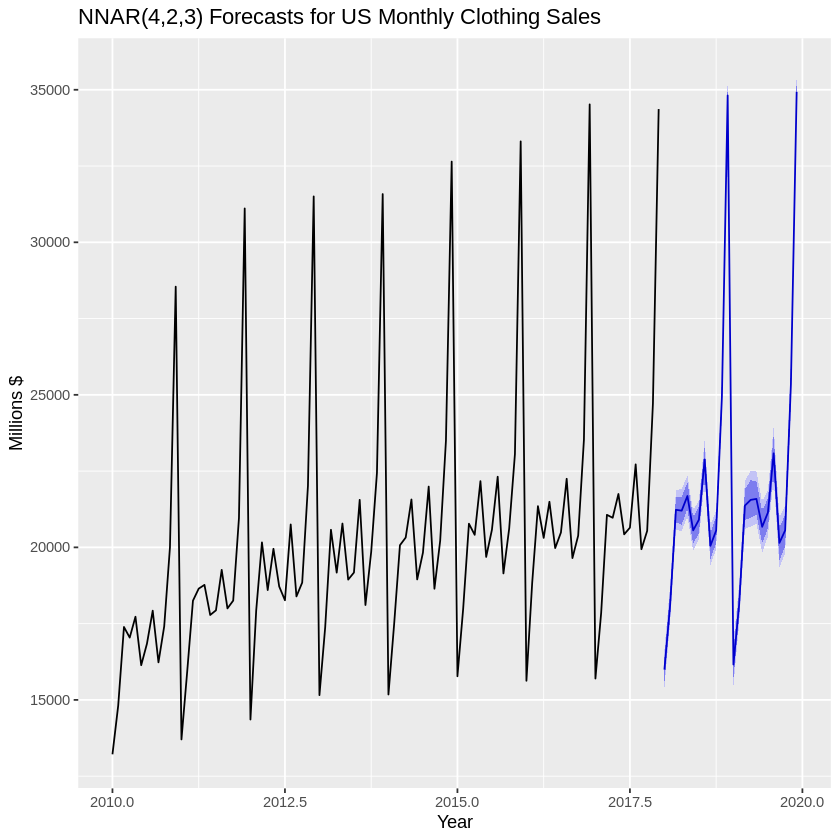

In [ ]:
## GRAFICO DE LAS PREDICCIONES DE LA SERIE
autoplot(fc) + 
  xlab("Year") + 
  ylab("Millions $") + 
  ggtitle("NNAR(4,2,3) Forecasts for US Monthly Clothing Sales")